### Questions to be answered
##### * #sales with amount>1000
##### * #sales with more than 3 tops sold
##### * total sales by cat
##### * avg amount of each cat

### reading file using pandas

In [58]:
#importing panas
import pandas as pd 
import matplotlib.pyplot as plt

#reading the file
sales = pd.read_excel('sales_data.xlsx')

#checking wether file is loaded correctly
#sales.head()

#reading a description 
sales.describe()

,index,Qty,Amount,ship-postal-code,B2B
count,128975.000000,128975.000000,121180.000000,128935.000000,128968.000000
mean,64487.000000,0.904431,648.561465,463963.108256,0.006754
std,37232.019822,0.313354,281.211687,191475.865632,0.081903
min,0.000000,0.000000,0.000000,110001.000000,0.000000
25%,32243.500000,1.000000,449.000000,382421.000000,0.000000
50%,64487.000000,1.000000,605.000000,500033.000000,0.000000
75%,96730.500000,1.000000,788.000000,600024.000000,0.000000
max,128974.000000,15.000000,5584.000000,989898.000000,1.000000


### cleaning the data

In [4]:
# finding empty values
sales.isnull()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
128971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
128973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [6]:
# finding the number of empty vals in each col
sales.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               40
ship-postal-code         40
ship-country             40
promotion-ids         49160
B2B                       7
fulfilled-by          89699
dtype: int64

In [9]:
#eliminating data for which amount is empty value and checking the results
sales_cleaned = sales.dropna(subset='Amount')
sales_cleaned.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         5136
Qty                       0
currency                  0
Amount                    0
ship-city                31
ship-state               38
ship-postal-code         38
ship-country             38
promotion-ids         41705
B2B                       7
fulfilled-by          83640
dtype: int64

### Slicing and Filtering Data

In [34]:
#purchases with Top
cat_data = sales_cleaned[sales_cleaned['Category'] =='Top']
#cat_data
number_top = len(cat_data)
print(f"number of purchases with top is { number_top}")

number of purchases with top is 10165


In [33]:
#purchases with amount>1000
amount_sale = sales_cleaned[sales_cleaned['Amount']>= 1000]
#amount_sale
number_amount = len(amount_sale)
print(f"numebr of purchases with amount more than 1000 is {number_amount}")

numebr of purchases with amount more than 1000 is 13333


In [31]:
#purchases with more than 3 tops
tops3 = sales_cleaned[(sales_cleaned['Category']== 'Top') & (sales_cleaned['Qty'] ==3)]
#tops3
number_tops3 = len(tops3)
print (f'number of purchases with 3 tops is {number_tops3}')

number of purchases with 3 tops is 3


### Aggregating 

In [42]:
#total sales by category
total_sale = sales_cleaned.groupby('Category', as_index=False)['Amount'].sum()
pd.DataFrame(total_sale)

,Category,Amount
0,Blouse,21757954.88
1,Bottom,150667.98
2,Dress,12131224.11
3,Scarf,915.00
4,Set,39204124.03
5,Top,5347792.30


array([[<Axes: title={'center': 'Amount'}>]], dtype=object)

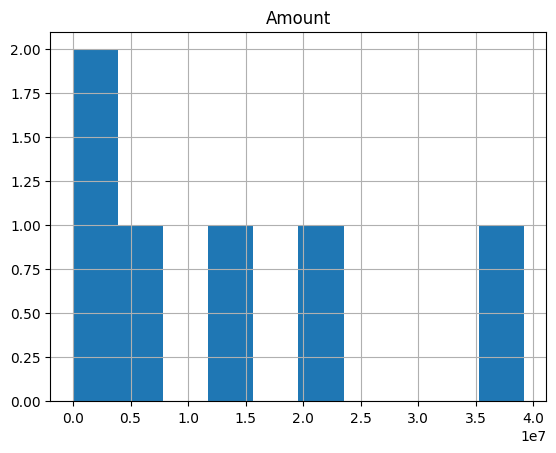

In [46]:
total_sale.sort_values('Amount').hist()

In [51]:
finished_avg = sales_cleaned.groupby('Category', as_index=False)['Amount'].mean()
finished_avg

,Category,Amount
0,Blouse,457.119099
1,Bottom,358.733286
2,Dress,760.482956
3,Scarf,305.000000
4,Set,833.385571
5,Top,526.098603


(array([[6., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 1., 0., 0., 2.]]),
 array([  0.        ,  83.3385571 , 166.6771142 , 250.01567129,
        333.35422839, 416.69278549, 500.03134259, 583.36989969,
        666.70845678, 750.04701388, 833.38557098]),
 <a list of 2 BarContainer objects>)

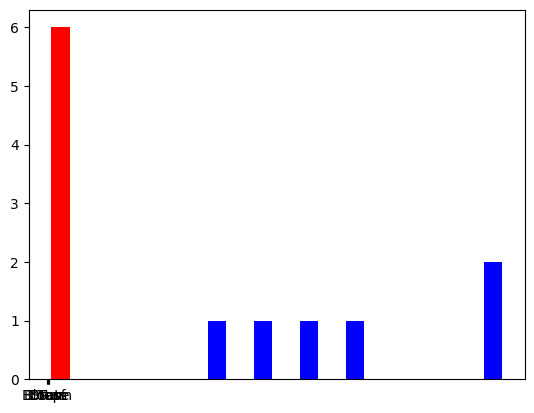

In [67]:
a = finished_avg.sort_values("Category")
plt.hist(a, histtype = 'bar', color={'red','blue'})

### Exporting data

In [68]:
finished_avg.to_excel('finished_avg_of_purchases.xlsx')
total_sale.to_excel('total_sale.xlsx')